In [1]:
!pip install numpy pandas matplotlib scikit-learn

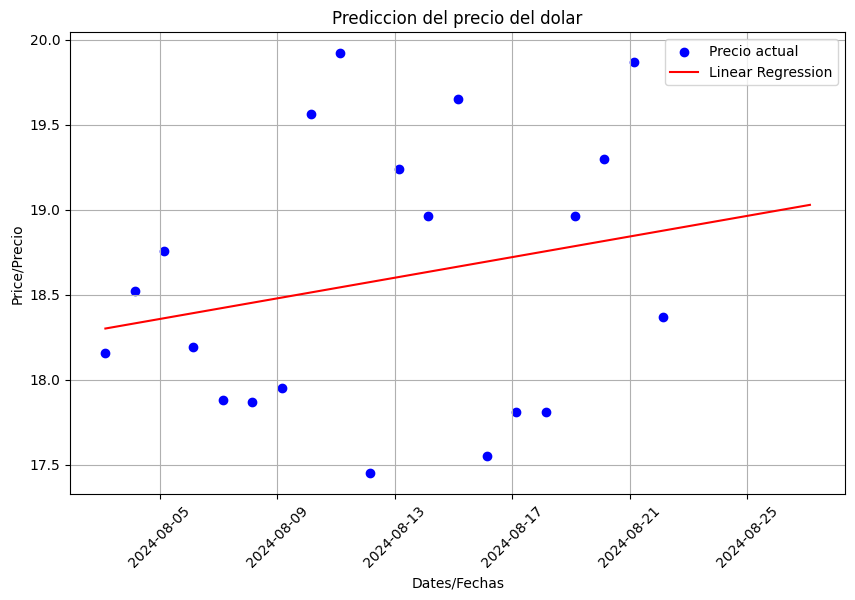

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

# Crear un dataset ficticio (editable)
np.random.seed(42)
dates = [datetime.now() - timedelta(days=i) for i in range(20)]
prices = np.round(np.random.uniform(17.4, 20.0, size=20), 2)

# Crear dataframe (editable)
df = pd.DataFrame({
    'Date': dates[::-1],
    'Price': prices[::-1],
})

# Preparar datos para regresion
X = np.array(range(len(df))).reshape(-1, 1)
y = df['Price'].values

# Crear modelo
model = LinearRegression()
model.fit(X, y)

# Configurar prediccion
future_days=5
X_future = np.array(range(len(df), len(df) + future_days)).reshape(-1, 1)
y_pred = model.predict(np.vstack((X, X_future)))

# Generar grafica
plt.figure(figsize=(10,6))
plt.scatter(df['Date'], y, color='blue', label='Precio actual')

# Usar pd.concat en lugar de append para combinar la serie de fechas
combined_dates = pd.concat([df['Date'], pd.Series([df['Date'].iloc[-1] + timedelta(days=i) for i in range(1, future_days+1)])])

# Graficar la línea de regresión con las fechas combinadas y las predicciones
plt.plot(combined_dates, y_pred, color='red', label='Linear Regression')

plt.title('Prediccion del precio del dolar')
plt.xlabel('Dates/Fechas')
plt.ylabel('Price/Precio')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()